Cointegrated Pairs: [('GOOGL', 'IWM'), ('GOOGL', 'SPY'), ('GOOGL', 'TSLA'), ('GOOGL', 'XLF'), ('MSFT', 'SPY')]


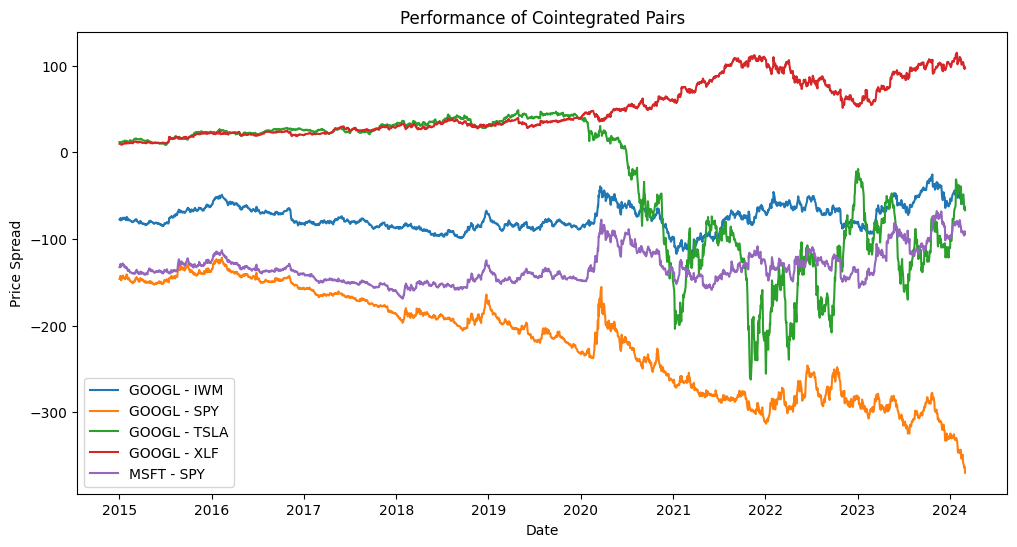

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import combinations

# Define asset list
assets = ["SPY", "QQQ", "IWM", "TLT", "XLF", "XLE", "AAPL", "MSFT", "GOOGL", "TSLA"]

def get_data(symbols, start="2015-01-01", end="2024-03-02"):
    data = yf.download(symbols, start=start, end=end, progress=False)["Close"]
    return data

def test_cointegration(pair, data):
    X, Y = data[pair[0]], data[pair[1]]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    residuals = model.resid
    p_value = sm.tsa.stattools.adfuller(residuals)[1]
    return p_value < 0.05

def identify_pairs(data):
    valid_pairs = []
    for pair in combinations(data.columns, 2):
        if test_cointegration(pair, data):
            valid_pairs.append(pair)
    return valid_pairs

# Fetch data
data = get_data(assets)

# Identify cointegrated pairs
pairs = identify_pairs(data)
print("Cointegrated Pairs:", pairs)

# Plot cumulative performance of identified pairs
plt.figure(figsize=(12, 6))
for pair in pairs:
    spread = data[pair[0]] - data[pair[1]]
    plt.plot(spread, label=f"{pair[0]} - {pair[1]}")
plt.legend()
plt.title("Performance of Cointegrated Pairs")
plt.xlabel("Date")
plt.ylabel("Price Spread")
plt.show()

# Placeholder for options backtest implementation (straddle pricing, execution logic, PnL tracking)
# To be developed using options data APIs like Intrinio, ORATS, or custom implied volatility models
